# Airbnb Seattle Data Analysis

This project aims at analyzing Seattle Airbnb Data and coming up with some meaningful insights and vizualizations

## Intoduction

Airbnb is an online service which provides a platform for posting your rental property and helps connect the renters to the customers. It is important that the customer as well as the renters are well informed so that the service profits with it's quality service. The Airbnb Seattle data is available from Kaggle. The dataset includes full description and average review score for listed places. 

In [12]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Business Understanding

**Q1 - On average, how much does it cost to stay in Seattle for one night? <br>
Q2 - What is the average cost of stay based on the property type? <br>
Q3 - What are the average ratings for each of the property type? <br>
Q4 - How does the property distribution look like? <br>
Q5 - What is the best month to visit Seattle based on the pricing and availibilty?**

## Data Understanding

In [13]:
#Let us look at the data
df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
cal = pd.read_csv('./calendar.csv')
cal.head()

,listing_id,date,available,price
0,241032,1/4/2016,t,85.0
1,241032,1/5/2016,t,85.0
2,241032,1/6/2016,f,NaN
3,241032,1/7/2016,f,NaN
4,241032,1/8/2016,f,NaN


In [15]:
df.isnull().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [16]:
cal.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.332559
dtype: float64

## Data Preparation

In [17]:
def plt_histogram(data):
    '''
    Plots a histogram with the following properties. 
    
    Attributes: data: data for which the histogram is to be plotted
    
    Output: Plots a Histogram
    
    '''
    histpp = plt.hist(data)
    plt.xlabel('Value',fontsize=10)
    plt.xticks(rotation='vertical')
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Price Per Person',fontsize=10) #Plotting the Histogram.

In [23]:
df['eff_price'] = np.where(df.guests_included == 0, df['price'] + df['extra_people'], df['price']) #Adding prices to places where total included guests are 0.
df['guests_included'].replace(0, 1, inplace=True)
df['eff_price'] = df['eff_price']*df['minimum_nights'] #Factoring in the minimum nights that are required to book the property.
df['priceperperson'] = df['eff_price']/df['guests_included']
filtered_price_per_person = df['priceperperson'].where(df['priceperperson'] < 2500.00) #Filtering out few values as they are not necessarily needed on the plot.
filtered_price_per_person = filtered_price_per_person.dropna()

In [19]:
df['average_rating'] = (df['review_scores_accuracy'] + df['review_scores_cleanliness'] +  df['review_scores_checkin'] + df['review_scores_communication'] + df['review_scores_location'] + df['review_scores_value'])/6  
df['average_rating'].isnull().sum()/df['average_rating'].count() #Counting the nulls

0.20899303356554783

In [20]:
fill_mean = lambda col: col.fillna(col.mean()) #Filling in the missing entries with the mean of the ratings.
df['average_rating'] = df[['average_rating']].apply(fill_mean, axis=0)

In [21]:
cal['date'] = pd.to_datetime(cal['date']) #Split the date into day, month, year
cal['month'] = cal['date'].dt.month
cal['year'] = cal['date'].dt.year
cal['day'] = cal['date'].dt.day
cal['available'] = cal.available.map(dict(t=1, f=0))

## Data Modeling

**Q1. On average, how much does it cost to stay in Seattle for one night?**

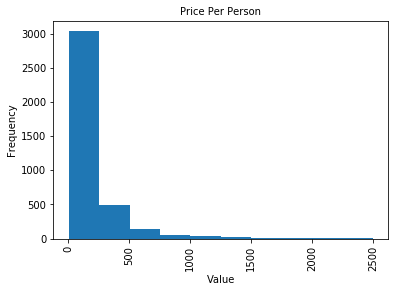

In [25]:
#Q1 - On average, how much does it cost to stay in Seattle for one night?
plt_histogram(filtered_price_per_person)

In [26]:
df['priceperperson'].describe() #Looking at the stats.

count      3818.000000
mean        244.723981
std        2441.724831
min           2.333333
25%          68.000000
50%         116.833333
75%         219.375000
max      150000.000000
Name: priceperperson, dtype: float64

**Q2. What is the average cost of stay based on the property type?**

In [27]:
df.groupby(['property_type']).mean()['priceperperson'].sort_values().dropna()

property_type
Dorm                39.500000
Yurt                50.000000
Tent                54.000000
Other              116.318182
Camper/RV          140.730769
Townhouse          145.708485
Cabin              146.071429
Bed & Breakfast    156.391892
Chalet             166.000000
Boat               169.458333
Bungalow           171.153846
Loft               174.175000
Treehouse          183.666667
House              207.991281
Condominium        253.732601
Apartment          297.676717
Name: priceperperson, dtype: float64

**Q3. What are the average ratings for each of the property type?** 

In [28]:
df.groupby(['property_type']).mean()['average_rating'].sort_values().dropna()

property_type
Chalet              8.500000
Dorm                9.250000
Boat                9.591791
Apartment           9.622446
Tent                9.628383
House               9.648049
Other               9.648140
Treehouse           9.658416
Bed & Breakfast     9.663812
Loft                9.679002
Condominium         9.698872
Camper/RV           9.725057
Townhouse           9.733554
Cabin               9.825397
Bungalow            9.825717
Yurt               10.000000
Name: average_rating, dtype: float64

**Q4. How does the property distribution look like?**

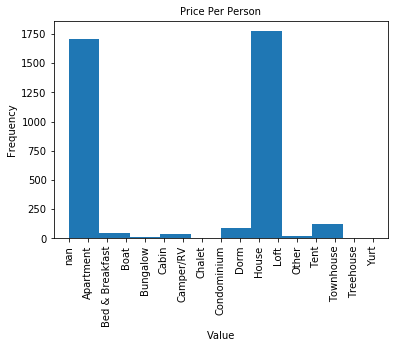

In [29]:
plt_histogram(df['property_type'])

In [30]:
print(df.groupby(['property_type'])['id'].count().sort_values(ascending = False))

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: id, dtype: int64


**Q5. What is the best month to visit Seattle based on the pricing and availibilty?**

In [31]:
cal.groupby(['month']).mean()['price'].sort_values(ascending=False).dropna()

month
7     155.263716
8     153.568647
6     150.736863
9     145.891914
5     142.738599
12    139.260159
10    139.166124
4     137.792685
11    137.422926
3     131.108504
2     126.325086
1     125.103239
Name: price, dtype: float64

In [32]:
cal['availability'] = cal['available']
cal.groupby(['month'])[['availability', 'price']].mean().sort_values(ascending=False, by = 'availability').dropna()

,availability,price
month,,
12,0.730838,139.260159
3,0.711429,131.108504
11,0.708438,137.422926
10,0.690262,139.166124
5,0.673849,142.738599
6,0.671656,150.736863
9,0.669068,145.891914
4,0.665251,137.792685
2,0.662650,126.325086


In [33]:
cal.groupby(['day'])['available'].mean().sort_values(ascending=False).dropna()

day
1     0.679198
29    0.678850
27    0.678618
28    0.678154
26    0.677922
30    0.676614
25    0.676500
31    0.675867
24    0.675175
23    0.673928
22    0.673667
21    0.673000
20    0.672507
19    0.671927
18    0.671085
2     0.669916
17    0.667227
3     0.665960
16    0.663544
15    0.663195
12    0.662731
14    0.662528
13    0.662470
11    0.662209
10    0.661368
9     0.656930
8     0.655276
7     0.653739
6     0.653014
5     0.652666
4     0.649040
Name: available, dtype: float64

## Evaluation

It was found that availability is generally high in the months of October, November, December with prices around $140 for one night.